(Problema de Cayley y los fractales 1879) ¿Si se parte de un punto aleatorio del plano complejo, a qué raíz de la función $f(z) = z^3 − 1$ (donde z = x + iy) converge el método generalizado de Newton-Raphson?. Esta función tiene las siguientes raíces $f(zi) = 0, i = 0, 1, 2$:
$$z_0 = \frac{−1}{2}+\frac{√3}{2}i$$
$$z_1 = \frac{−1}{2}-\frac{√3}{2}i$$
$$z_2 = 1+0i$$
La aplicación del método de generalizado de Newton al polinomio $f(z) = z^3 − 1$ genera una frontera en el plano complejo denominada fractal de Newton

In [107]:
import sympy as sym
import numpy as np
from sympy import symbols
import matplotlib.pyplot as plt
from tqdm import tqdm

In [108]:
x = symbols('x',real=True)
y = symbols('y',real=True)

In [109]:
z = x + sym.I*y

In [110]:
f_z = z**3 -1

In [111]:
F=[sym.re(f_z),sym.im(f_z)]
F

[x**3 - 3*x*y**2 - 1, 3*x**2*y - y**3]

In [112]:
J = sym.Matrix([F]).jacobian([x, y])
J

Matrix([
[3*x**2 - 3*y**2,          -6*x*y],
[          6*x*y, 3*x**2 - 3*y**2]])

In [113]:
Fn = sym.lambdify([x,y],F,'numpy')
Jn = sym.lambdify([x,y],J,'numpy')

Matrix([
[3*x**2 - 3*y**2,          -6*x*y],
[          6*x*y, 3*x**2 - 3*y**2]])

In [114]:
def GetNewtonRaphson(Fn,Jn,z0,itmax = 100, precision=1e-5):
    
    error = 1
    it = 0
    zn = z0

    while error > precision and it <= itmax:
        
        Jinv=np.linalg.inv(Jn(z0[0],z0[1]))
        
        zn=z0-np.dot(Jinv,Fn(z0[0],z0[1]))
        
        error=np.linalg.norm(zn-z0)
        
        z0=zn
    
    return zn

In [115]:
z0=np.array([0.5,0.5])
raiz_z0=GetNewtonRaphson(Fn,Jn,z0)
raiz_z0

array([-0.5      ,  0.8660254])

In [116]:
raiz_z1=np.array([-0.5,(-0.5*np.sqrt(3))])
raiz_z2=np.array([1,0])
raiz_z1,raiz_z2

(array([-0.5      , -0.8660254]), array([1, 0]))

In [125]:
roots = np.array([[raiz_z0], [raiz_z1], [raiz_z2]])
index = np.array([20,100,255])

In [126]:
N=300
X = np.linspace(-1, 1, N)
Y = np.linspace(-1, 1, N)

In [127]:
Fractal = np.zeros((N,N), np.int64)

In [137]:
for i in tqdm(range(N)):
    for j in range(N):
        
        Root_N=GetNewtonRaphson(Fn,Jn,[X[i],Y[j]])
        
        for k in range(len(roots)):
            if np.allclose(Root_N,roots[k]):
                Fractal[i, j] = index[k]

100%|██████████| 300/300 [01:35<00:00,  3.13it/s]


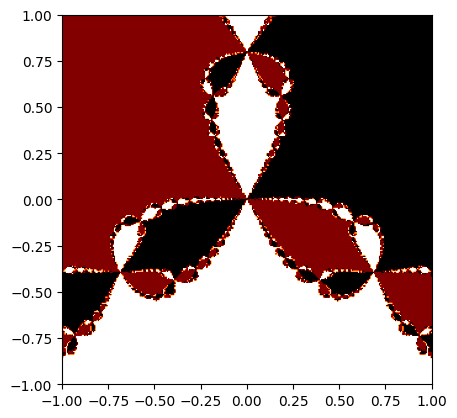

In [143]:
plt.imshow(Fractal, cmap="gist_heat" ,extent=[-1,1,-1,1])